# [1] 2D Linear Optimisation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import *

init_printing(use_unicode=True)

### Input Data Points
Initialise all input data for optimisation problems.

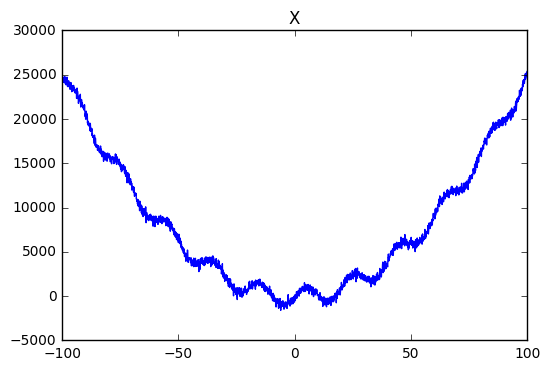

In [2]:
def f(t):
    return 2.5*t**2 - 100

t  = np.arange(-100,100,0.1)
x0 = f(t) # Raw X
n  = np.random.normal(0,300,x0.shape) # Gaussian noises
m  = 1000*np.sin(t/np.pi) # Ripple noises
x  = x0 + n + m

plt.figure(1)
plt.title('X')
plt.plot(t, x)
plt.show()


### Least square error fitting

Given data points `X`, we want to find the best estimated polynomial 
which yields minimal least square error.

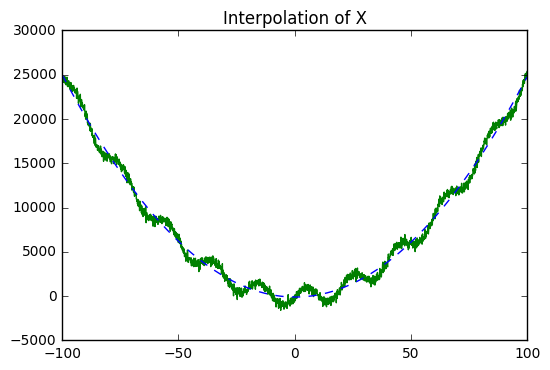

In [3]:
c  = np.polyfit(t, x, 2) # Coefficients of degree-2 polynomial
ft = np.poly1d(c) # Generate polynomial func

x_ = ft(t) # Generate interpolated values

plt.figure(1)
plt.plot(t, x, color='green')
plt.plot(t, x_, color='blue', linestyle='dashed')
plt.title('Interpolation of X')
plt.show()

# Build symbolic polynomial expression 
z = symbols('x')
p = c[0]*z**2 + c[1]*z + c[0]
p

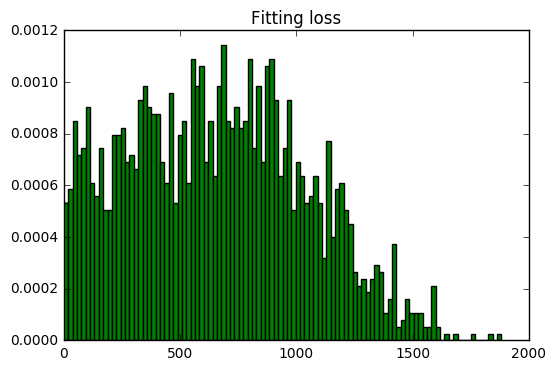

RMSE = 579146.928


In [4]:
# Compute the distributions of errors
e    = np.abs(x - x_)
rmse = np.mean((x - x_)**2)

plt.figure(1)
plt.title('Fitting loss')
plt.hist(e, 100, normed=1, facecolor='g')
plt.show()

print('RMSE = {0:0.3f}'.format(rmse))

# [2] 3D Linear Optimisation

Input data:

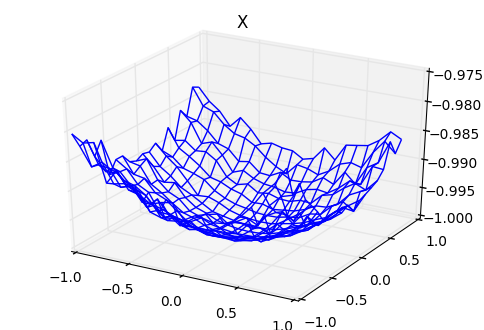

In [39]:
def g(X,Y):
    # Paraboloid with ripple noises
    return (X**2 + Y**2)/100 - np.random.normal(1, (X**2 + Y**2)/1000)

X = np.arange(-1,1,0.1)
Y = np.arange(-1,1,0.1)
X,Y = np.meshgrid(X,Y)
Z = g(X,Y)

from mpl_toolkits.mplot3d import Axes3D

fig  = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')

ax3d.plot_wireframe(X,Y,Z)
plt.title('X')
plt.show()


### Convex optimisation -> Gradient Descent